### 2022-1 Artificial Intelligence (01)
## Homework #1: MLP from the scratch
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

Ewha Womans University

In [1]:
import numpy as np

In [2]:
# Sigmoid function
def sigmoid(x):
  # Problem 1.(a): fill here
  return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def dsigmoid(x):
  # Problem 1.(a): fill here
  return sigmoid(x) * (1 - sigmoid(x))

# Hyperbolic tangent function
def tanh(x):
  # Problem 1.(a): fill here
  return np.tanh(x)

# Derivative of hyperbolic tangent function
def dtanh(x):
  # Problem 1.(a): fill here
  return 1 - np.square(tanh(x))

In [3]:
# Mean squared error function
def MSE(O, T):
  # Problem 1.(b): fill here
  N = O.shape[0]
  return (1/N) * np.sum(np.power(O-T, 2))

# Derivative of hyperbolic tangent function
def dMSE(O, T):
  # Problem 1.(b): fill here
  return (O - T)

In [11]:
class MLP:

  def __init__(self, learning_rate=0.01, n_epochs=5, n_inputs=2, n_hiddens=2, n_outputs=1):
    self.lr = learning_rate
    self.n_epochs = n_epochs
    
    self.n_inputs = n_inputs
    self.n_hiddens = n_hiddens
    self.n_outputs = n_outputs

    self.first_layer_activation_func = tanh
    self.first_layer_dactivation_func = dtanh
    self.second_layer_activation_func = sigmoid
    self.second_layer_dactivation_func = dsigmoid
    self.loss_func = MSE
    self.dloss_func = dMSE
    self.first_layer_weights = None
    self.first_layer_bias = None
    self.second_layer_weights = None
    self.second_layer_bias = None

  def _init_params(self):
    # Problem 1.(c): fill here
    np.random.seed(42)
    
    self.first_layer_weights = np.random.rand(self.n_inputs, self.n_hiddens)
    self.first_layer_bias = np.random.rand(self.n_hiddens)
    
    self.second_layer_weights = np.random.rand(self.n_hiddens, self.n_outputs)
    self.second_layer_bias = np.random.rand(self.n_outputs)

  def _forward(self, X, T):
    # Problem 1.(d): fill here
    Z1 = np.dot(X, self.first_layer_weights) + self.first_layer_bias
    A1 = self.first_layer_activation_func(Z1)
    Z2 = np.dot(A1, self.second_layer_weights) + self.second_layer_bias
    A2 = self.second_layer_activation_func(Z2)

    if T is None:
      return A2
    
    else:
      loss = self.loss_func(A2, T)
      return Z1, A1, Z2, A2, loss

    

  def _backward(self, X, Z1, A1, Z2, A2, T):
    # Problem 1.(e): fill here
    dA2 = self.dloss_func(A2, T)
    dZ2 = dA2 * self.second_layer_dactivation_func(Z2)
    dW2 = np.dot(A1.transpose(), dZ2)
    dB2 = np.dot(np.ones(shape=(1, X.shape[0])), dZ2)
    dA1 = np.dot(dZ2, self.second_layer_weights.transpose())
    dZ1 = dA1 * self.first_layer_dactivation_func(Z1)
    dW1 = np.dot(X.transpose(), dZ1)
    dB1 = np.dot(np.ones(shape=(1, X.shape[0])), dZ1)
    return dW1, dB1, dW2, dB2

  def predict(self, X):
    return self._forward(X, None)

  def fit(self, X, T):
    
    self._init_params()
    loss_trace = []

    for _ in range(self.n_epochs):
      Z1, A1, Z2, A2, loss = self._forward(X, T)
      dW1, dB1, dW2, dB2 = self._backward(X, Z1, A1, Z2, A2, T)
      
      # Problem 1.(f): fill here
      self.first_layer_weights -= self.lr * dW1
      self.first_layer_bias -= self.lr * dB1.reshape((2, ))
      self.second_layer_weights -= self.lr * dW2
      self.second_layer_bias -= self.lr * dB2.reshape((1, ))
      
      loss_trace.append(loss)

    return loss_trace

In [12]:
# Problem 1.(g): fill here

mlp = MLP(n_epochs=100000)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
loss_trace = mlp.fit(X, y)

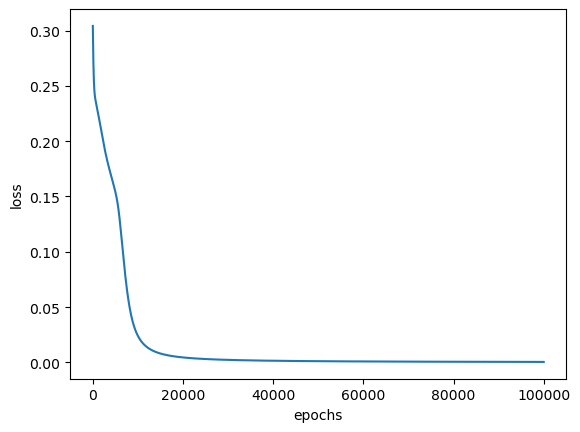

In [13]:
import matplotlib.pyplot as plt

plt.plot(loss_trace)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [14]:
# Print out XOR outputs for an input matrix X
print(mlp.predict(X))

[[0.02448005]
 [0.98139953]
 [0.98133357]
 [0.02583242]]
